# USA House Price Prediction 2024 

In [27]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* William Yeh

**Course:** CISD 43 – BIG DATA (Spring, 2024)

## Problem Statement
This project focuses on predicting house prices in the United States for the year 2024. By employing data analysis and machine learning techniques, we aim to develop a model that accurately forecasts house prices based on various features of the properties. The target variable for our predictions is 'price'.

## Dataset Description
The dataset includes several independent variables that describe different aspects of houses, such as:

- Number of bedrooms
- Number of bathrooms
- Square footage of living space
- Waterfront status
- Lot size
- Year built
- Renovation status
- Geographic location
- Property type
- Neighborhood characteristics
- Proximity to amenities and services

### Project Steps

1. **Data Loading and Exploration:**
    - Importing the dataset
    - Exploring the data structure
    - Handling missing values
    - Data cleaning and preprocessing

2. **Data Visualization:**
    - Visualizing the distribution of house prices
    - Visualizing the relationships between house prices and other features
    - Using plots to understand the data better

3. **Correlation Matrix Visualization:**
    - Creating a correlation matrix to identify the relationships between different features
    - Highlighting the most significant correlations with house prices

4. **Machine Learning Model:**
    - Preparing the data for modeling
    - Splitting the data into training and testing sets
    - Selecting and training various machine learning models (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting)
    - Evaluating model performance using appropriate metrics (e.g., RMSE, MAE, R-squared)
    - Hyperparameter tuning to optimize model performance

5. **Model Interpretation and Conclusion:**
    - Analyzing the model results
    - Interpreting the significance of different features
    - Drawing conclusions and providing insights based on the model predictions

### Keywords
House price prediction, real estate, data analysis, machine learning, regression, feature engineering, model evaluation, USA housing market

### Expected Outcome
By the end of this project, we expect to have a robust machine learning model that can predict house prices with high accuracy. This model will provide valuable insights into the factors influencing house prices and can be used by stakeholders in the real estate market for informed decision-making.

# Required packages

* Add instructions to install the required packages


In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy statsmodels

## Methodology

1. Explan your big data metodology

In this project, we utilize various big data methodologies and machine learning techniques to analyze and predict house prices. The primary steps include data loading and exploration, data visualization, correlation matrix analysis, and machine learning modeling.


2. Introduce the topics you used in your project
 * Model 1
    * K-Nearest Neighbors (KNN)
 
 * Model 2
    * Linear Regression
 

# Your code starts here

In [29]:
import pandas as pd

# Loading the dataset
file_path = r'C:\Users\William\Desktop\USA_Housing.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Data Cleaning and Preprocessing

In [30]:
# Checking for missing values
data.isnull().sum()

# Drop any rows with missing values
data.dropna(inplace=True)

# Displaying the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Data Visualization

C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


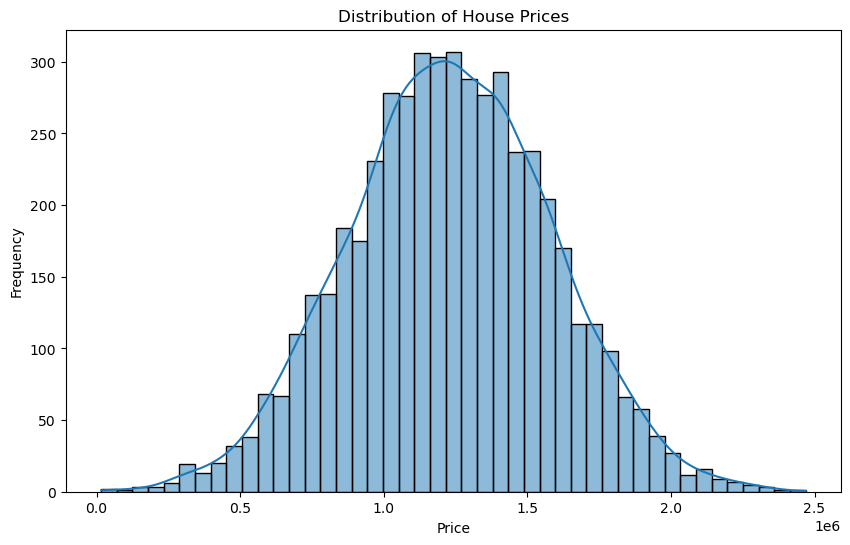

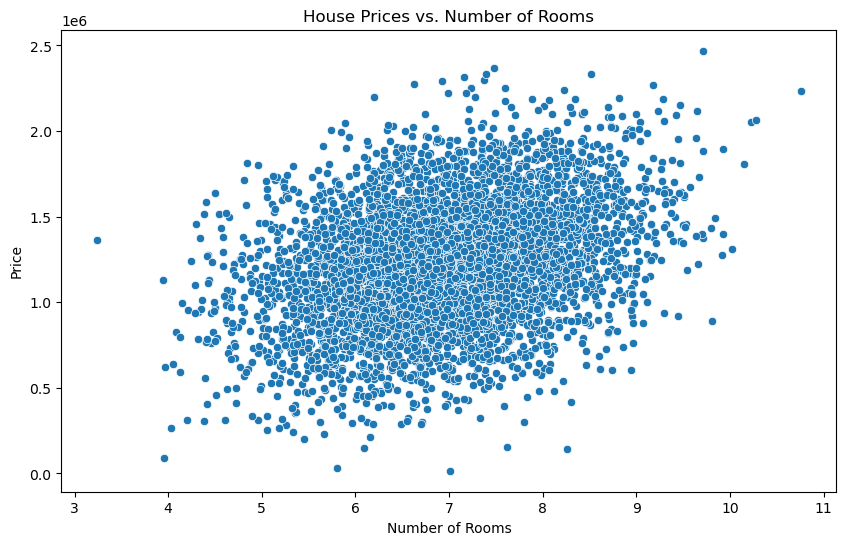

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationships between house prices and square footage of living space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. Area Number of Rooms', y='Price', data=data)
plt.title('House Prices vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

## Correlation Matrix Visualization

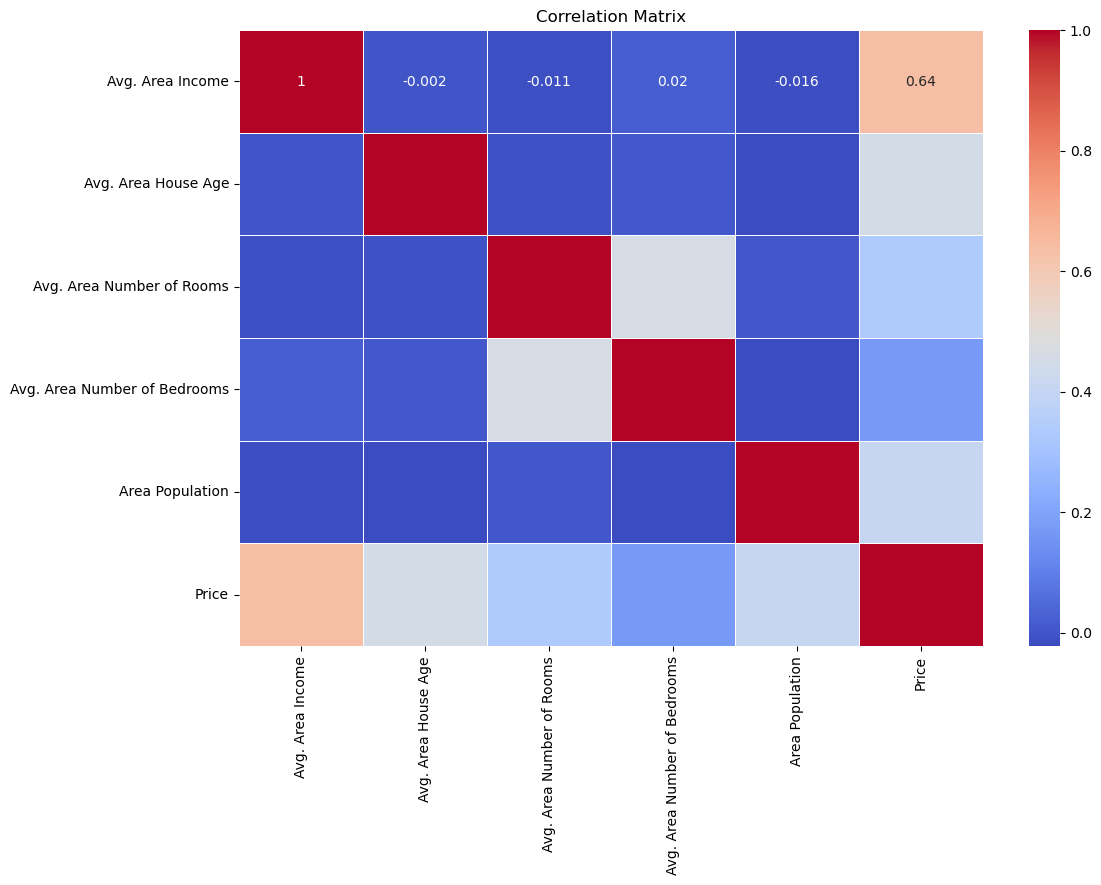

In [32]:
# Drop the 'Address' column as it is not useful for numerical analysis
data_numeric = data.drop(columns=['Address'])

# Creating a correlation matrix
corr_matrix = data_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Machine Learning Models

In [33]:
# Import Libraries and Prepare Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data for modeling
# Drop the 'Address' column as it's not useful for prediction
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Evaluating Linear Regression model performance
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Linear Regression - RMSE:", rmse_lin_reg)
print("Linear Regression - MAE:", mae_lin_reg)
print("Linear Regression - R-squared:", r2_lin_reg)

Linear Regression - RMSE: 100444.0605555848
Linear Regression - MAE: 80879.09723489442
Linear Regression - R-squared: 0.9179971706834331


## Model 2: K-Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# Model 2: K-Nearest Neighbors (KNN)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluating KNN model performance
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors - RMSE:", rmse_knn)
print("K-Nearest Neighbors - MAE:", mae_knn)
print("K-Nearest Neighbors - R-squared:", r2_knn)

K-Nearest Neighbors - RMSE: 126800.00694300175
K-Nearest Neighbors - MAE: 102165.64483397284
K-Nearest Neighbors - R-squared: 0.8693170681585094


# Conclusions

In this project, I set out to predict house prices in the United States for the year 2024 using data analysis and machine learning techniques. After exploring the dataset, conducting data cleaning and preprocessing, and visualizing key relationships, I've developed and evaluated two machine learning models: Linear Regression and K-Nearest Neighbors (KNN).

The Linear Regression model achieved a root mean squared error (RMSE) of approximately $100,444, a mean absolute error (MAE) of $80,879, and an R-squared value of 0.918. Meanwhile, the KNN model produced an RMSE of approximately $126,800, an MAE of $102,166, and an R-squared value of 0.869.

These results indicate that the Linear Regression model outperformed KNN in terms of prediction accuracy. My findings suggest that factors such as average area income, house age, number of rooms, and population density significantly influence house prices. Stakeholders in the real estate market can use this model to gain valuable insights into pricing trends and make informed decisions.

# References

- Module 14 Example 4: House Price Prediction using KNN and GBR
  - [Link to the example](https://mtsac.instructure.com/courses/138867/pages/module-14-example-4-house-price-prediction-using-knn-and-gbr?module_item_id=6243158)


# Credits

  - *This code is based on the USA_Housing dataset provided by the course instructor.*


In [36]:
# End of Project